# Data Cleaning and Preprocessing

In this section, I perform preliminary data cleaning and preprocessing. The original dataset contains used car listings from across the U.S., however for the scope of this project I focus on German car manufacturers. 
Key preprocessing steps include:
- Inspecting the original dataset to understand features and data types.
- Removing features irrelevant for analysis.
- Filtering listings to include only German manufacturers (BMW, Mercedes-Benz, Audi, Porsche, Volkswagen).
- Handling missing values, removing duplicates, and addressing outliers.
- Converting data types for compatibility with analysis.

In [1]:
import pandas as pd

initial = pd.read_csv('/Users/AyaHourani 1/Desktop/vehicles.csv')
pd.set_option('display.max_columns', initial.columns.size)

In [2]:
# Initial Inspection
initial.info()
initial.describe()
initial.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [3]:
# Defining and filtering the German manufacturers
german_brands = ['bmw', 'mercedes-benz', 'audi', 'porsche', 'volkswagen']
german = initial[initial['manufacturer'].str.lower().isin(german_brands)].copy()

In [4]:
german.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
91,7309876037,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,31990,2018.0,audi,q5 premium sport utility 4d,good,NaN,gas,19179.0,clean,other,WA1ANAFY7J2102310,NaN,NaN,other,NaN,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-20T11:51:17-0500
99,7309229548,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29590,2018.0,audi,a6 2.0t premium sedan 4d,good,NaN,gas,13035.0,clean,other,WAUC8AFC6JN041814,fwd,NaN,sedan,NaN,https://images.craigslist.org/00K0K_dtlyDZgN92...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-19T09:51:14-0500
120,7306259907,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,6000,2007.0,mercedes-benz,e320 cdi,good,6 cylinders,diesel,124000.0,clean,automatic,NaN,rwd,NaN,sedan,blue,https://images.craigslist.org/00g0g_6wqTC1Js5v...,Diesel engine Mercedes e class. 7 speed auto t...,NaN,al,32.592,-85.5189,2021-04-13T12:54:00-0500
132,7305578496,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,28590,2018.0,audi,q5 premium sport utility 4d,good,NaN,gas,31033.0,clean,other,WA1ANAFY2J2198475,NaN,NaN,SUV,silver,https://images.craigslist.org/00t0t_cYUkNaOVDu...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-12T08:51:46-0500
134,7305150035,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,29990,2018.0,audi,a6 2.0t premium plus sedan,good,NaN,other,24996.0,clean,automatic,WAUG8AFC8JN040987,NaN,NaN,sedan,silver,https://images.craigslist.org/00p0p_2VWZyB4Dy3...,Carvana is the safer way to buy a car During t...,NaN,al,32.590,-85.4800,2021-04-11T10:11:17-0500


In [5]:
# Removing Irrelevant Columns
columns_drop = ['region', 'url', 'region_url', 'image_url', 'description', 'posting_date',
           'id', 'VIN', 'size', 'paint_color', 'county', 'drive']
german.drop(columns = columns_drop, inplace=True, errors='ignore')

In [6]:
german.head()
#print(german_car_dataset.loc[german_car_dataset['manufacturer'] == 'bmw'])

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,state,lat,long
91,31990,2018.0,audi,q5 premium sport utility 4d,good,NaN,gas,19179.0,clean,other,other,al,32.590,-85.4800
99,29590,2018.0,audi,a6 2.0t premium sedan 4d,good,NaN,gas,13035.0,clean,other,sedan,al,32.590,-85.4800
120,6000,2007.0,mercedes-benz,e320 cdi,good,6 cylinders,diesel,124000.0,clean,automatic,sedan,al,32.592,-85.5189
132,28590,2018.0,audi,q5 premium sport utility 4d,good,NaN,gas,31033.0,clean,other,SUV,al,32.590,-85.4800
134,29990,2018.0,audi,a6 2.0t premium plus sedan,good,NaN,other,24996.0,clean,automatic,sedan,al,32.590,-85.4800


In [7]:
# Handling Missing Values
german = german.dropna()

In [8]:
# Removing Duplicates
german = german.drop_duplicates()

In [9]:
# Formatting Column Data Types

# String Data Types
german['manufacturer'] = german['manufacturer'].str.lower()
german['condition'] = german['condition'].str.lower()
german['model'] = german['model'].str.lower()
german['fuel'] = german['fuel'].str.lower()
german['title_status'] = german['title_status'].str.lower()
german['transmission'] = german['transmission'].str.lower()
german['type'] = german['type'].str.lower()
german['cylinders'] = german['cylinders'].astype(str).str.lower()
german['state'] = german['state'].astype(str).str.upper()

# Converting 'cylinders' column to integer data type
# Removing 'cylinders' and whitespace
german['cylinders'] = german['cylinders'].str.replace('cylinders', '', regex=False).str.strip()
# Converting to numeric
german['cylinders'] = pd.to_numeric(german['cylinders'], errors='coerce')
german = german.dropna(subset=['cylinders'])

# Integer Data Types
german['year'] = german['year'].astype(int)
german['price'] = german['price'].astype(int)
german['odometer'] = german['odometer'].astype(int)
german['cylinders'] = german['cylinders'].astype(int)

In [10]:
german.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,state,lat,long
120,6000,2007,mercedes-benz,e320 cdi,good,6,diesel,124000,clean,automatic,sedan,AL,32.592000,-85.518900
172,12950,2005,bmw,z4,excellent,6,gas,69586,clean,automatic,convertible,AL,33.384664,-86.737847
174,6995,2011,volkswagen,jetta sel,excellent,5,gas,172752,clean,automatic,sedan,AL,33.384664,-86.737847
181,19950,2009,porsche,boxster,excellent,6,gas,80190,clean,automatic,convertible,AL,33.384664,-86.737847
219,2500,1995,bmw,525i,fair,6,gas,110661,clean,automatic,sedan,AL,33.353800,-86.825400


In [11]:
# Removing Outliers

german = german[(german['price'] > 500) & (german['price'] < 150000)]
german = german[german['odometer'] < 250000]

# Feature Engineering

To enhance the dataset and extract more meaningful insights, I engineered several new features designed to support both exploratory analysis and predictive modeling. These features aim to capture vehicle efficiency, usage patterns, and price drivers specific to the German car market.

The newly created features include:

- <b>Car Age</b>: The number of years since the vehicle's manufacturing year (essential for determining depreciation value).

- <b>Region</b>: Derived from the state column to group listings by U.S. regions (e.g., Northeast, West, South).

- <b>Car Efficiency</b>: Based on the number of engine cylinders, indicating potential performance and fuel consumption.

- <b>Maintenance Indicator</b>: A categorical feature inferred from vehicle condition, estimating the likelihood of needing maintenance (“like new” suggests lower maintenance needs).

- <b>Price per Mile</b>: Calculated as the sale price divided by odometer reading — a proxy for value and wear.

- <b>Expected Mileage</b>: An estimate of how many miles a car should have, assuming 13,000 miles per year of ownership.

- <b>Mileage Indicator</b>: A categorical classification (Low, Moderate, High) comparing the actual odometer reading to the expected mileage.

In [12]:
# Determining Car Age
from datetime import datetime

current_year = datetime.now().year
german['car_age'] = current_year - german['year']

In [13]:
# Determining Region
state_to_region = {
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast',
    'RI': 'Northeast', 'VT': 'Northeast', 'NJ': 'Northeast', 'NY': 'Northeast',
    'PA': 'Northeast',

    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest',
    'WI': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest',
    'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',

    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South',
    'NC': 'South', 'SC': 'South', 'VA': 'South', 'DC': 'South',
    'WV': 'South', 'AL': 'South', 'KY': 'South', 'MS': 'South',
    'TN': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South',
    'TX': 'South',

    # West
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West',
    'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West',
    'WA': 'West'
}

german['region'] = german['state'].map(state_to_region)

In [14]:
# Car Efficiency
german['is_efficient'] = german['cylinders'].apply(lambda x: 1 if x <= 4 else 0)

In [15]:
# Maintenance Indicator
high_condition = ['new', 'like new', 'excellent']
german['maintenance_indicator'] = german['condition'].apply(lambda x: 1 if x in high_condition else 0)

In [16]:
# Price per Mile
german['price_per_mile'] = (german['price'] / german['odometer']).round(2)


In [17]:
# Mileage vs. Car Age
import numpy as np

# Average number of miles driven per year = 13000
german['expected_mileage'] = german['car_age'] * 13000

# Mileage Conditions
conditions = [
    german['odometer'] < german['expected_mileage'],
    (german['odometer'] >= german['expected_mileage']) & (german['odometer'] <= german['expected_mileage'] + 20000),
    german['odometer'] > german['expected_mileage'] + 20000
]

# Labels
choices = ['Low Mileage', 'Moderate Mileage', 'High Mileage']

# Creating new column using conditions and labels
german['mileage_indicator'] = np.select(conditions, choices, default='Unknown')

In [18]:
# Luxury Brands
luxury_brands = ['bmw', 'mercedes-benz', 'audi', 'porsche']

german['luxury'] = german['manufacturer'].apply(lambda x: 1 if x in luxury_brands else 0)

In [19]:
german.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,type,state,lat,long,car_age,region,is_efficient,maintenance_indicator,price_per_mile,expected_mileage,mileage_indicator,luxury
120,6000,2007,mercedes-benz,e320 cdi,good,6,diesel,124000,clean,automatic,sedan,AL,32.592000,-85.518900,18,South,0,0,0.05,234000,Low Mileage,1
172,12950,2005,bmw,z4,excellent,6,gas,69586,clean,automatic,convertible,AL,33.384664,-86.737847,20,South,0,1,0.19,260000,Low Mileage,1
174,6995,2011,volkswagen,jetta sel,excellent,5,gas,172752,clean,automatic,sedan,AL,33.384664,-86.737847,14,South,0,1,0.04,182000,Low Mileage,0
181,19950,2009,porsche,boxster,excellent,6,gas,80190,clean,automatic,convertible,AL,33.384664,-86.737847,16,South,0,1,0.25,208000,Low Mileage,1
219,2500,1995,bmw,525i,fair,6,gas,110661,clean,automatic,sedan,AL,33.353800,-86.825400,30,South,0,0,0.02,390000,Low Mileage,1


# Exploratory Data Analysis

## Numerical Features

This section visualizes how key numerical features relate to used car prices, helping identify trends and outliers. Plots are distinguished by manufacturer to reveal brand-level pricing behavior. Here we're visualizing:

- <b>Car Age vs. Price (by Manufacturer)</b>: A scatter plot showing how vehicle age affects resale value. As expected, newer cars are priced higher, with luxury brands like Porsche maintaining higher values even at older ages.

- <b>Odometer vs. Price (by Manufacturer)</b>: This scatter plot visualizes how mileage impacts price. Vehicles with higher odometer readings show consistent price drops, but the slope varies by brand — some luxury models depreciate more slowly.

- <b>Price Distribution Histogram</b>: A histogram showing the frequency of listing prices across the dataset. This helps identify the most common price ranges and detect outliers or skewed pricing behavior.

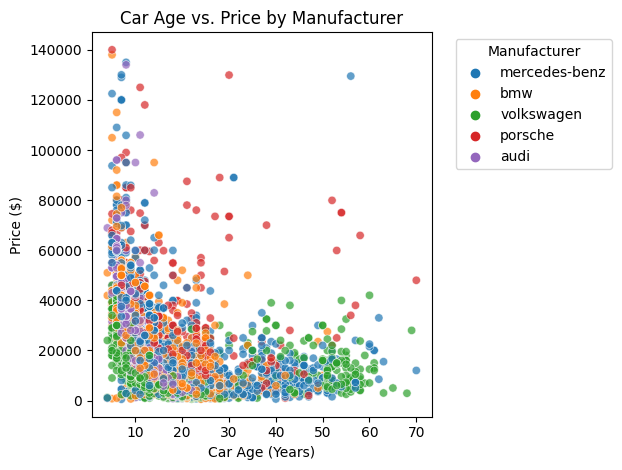

In [45]:
# Car age vs. Price by Manufacturer
sns.scatterplot(data=german, x='car_age', y='price', hue='manufacturer', alpha=0.7)
plt.title('Car Age vs. Price by Manufacturer')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price ($)')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

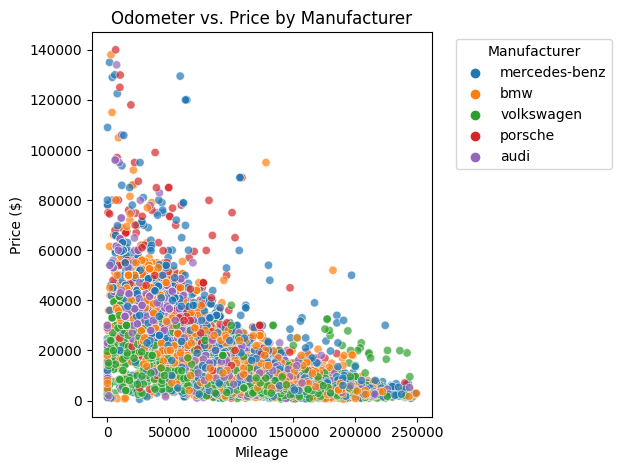

In [79]:
# Odometer vs. Price by Manufacturer
sns.scatterplot(data=german, x='odometer', y='price', hue='manufacturer', alpha=0.7)
plt.title('Odometer vs. Price by Manufacturer')
plt.xlabel('Mileage')
plt.ylabel('Price ($)')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

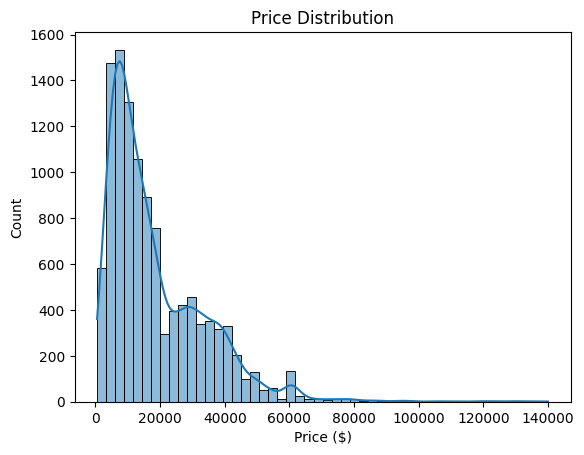

In [47]:
# Histogram of Price
sns.histplot(german['price'], bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.show()

## Categorical Features

This section explores how different categorical variables influence used car pricing. I used box plots to compare price distributions across categories, helping reveal trends, outliers, and relative pricing power.

Visual Comparisons:
- <b>Manufacturer vs. Price</b>: Highlights price variations across German brands (e.g., Porsche, BMW, Audi, etc.)

- <b>Transmission vs. Price</b>: Compares prices between manual and automatic vehicles.

- <b>Condition vs. Price</b>: Shows the impact of vehicle condition (like new, excellent, good, etc.) on price.

- <b>Region vs. Price</b>: Analyzes geographic pricing differences based on regional groupings derived from U.S. states.

- <b>Correlation Heatmap</b>: Provides a quick overview of how numerical variables relate to price and to each other.

Key Observations:
- Porsche consistently shows the highest median and upper-range listings among all manufacturers.
- Vehicle condition is strongly correlated with price — "like new" and "excellent" conditions command a clear premium.
- Region shows relatively minor pricing variation, suggesting location has less influence on German used car prices than condition or brand.

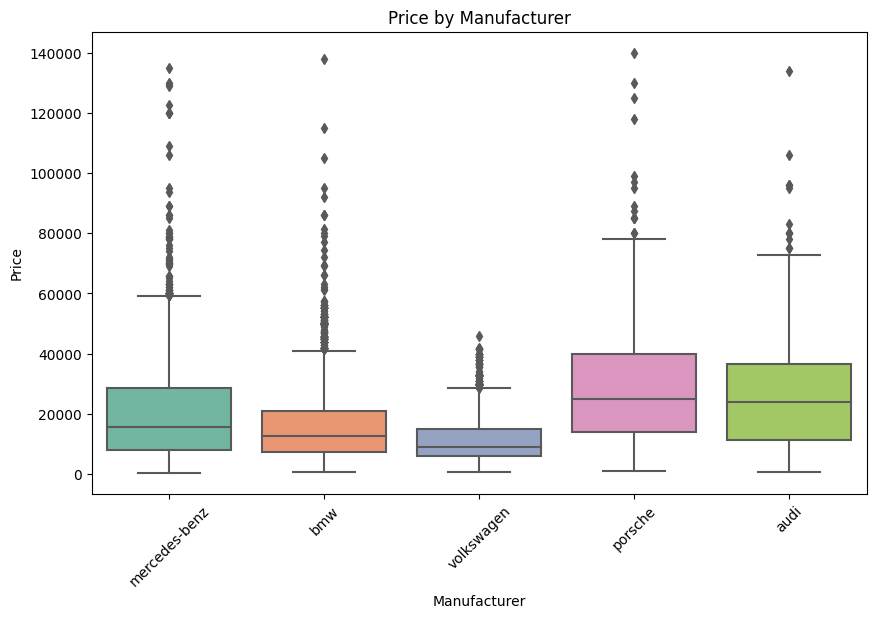

In [77]:
# Manufacturer vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=german, x='manufacturer', y='price', palette='Set2')
plt.title('Price by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

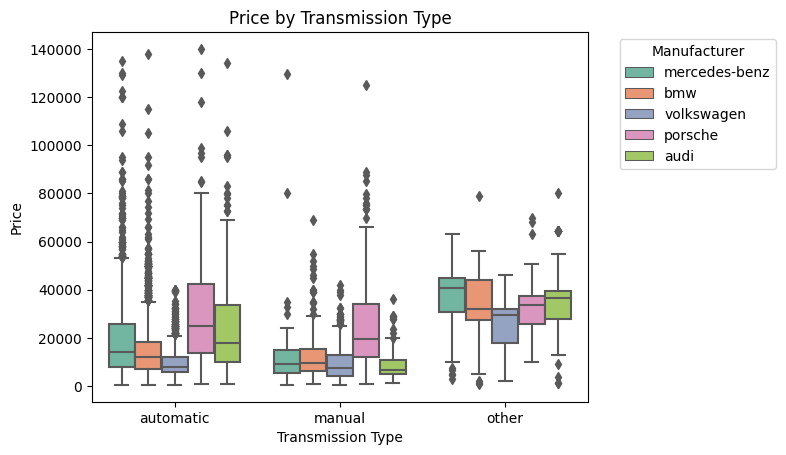

In [66]:
# Transmission vs. Price
sns.boxplot(data=german, x='transmission', y='price', hue='manufacturer', palette='Set2')
plt.title('Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

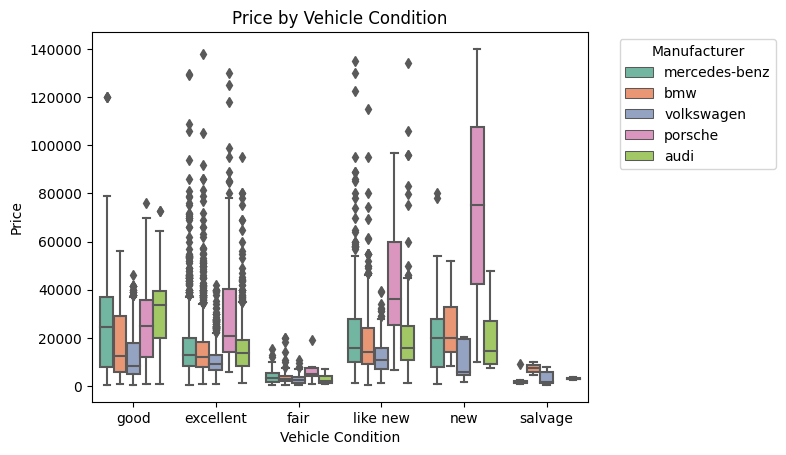

In [75]:
# Condition vs. Price
sns.boxplot(data=german, x='condition', y='price', hue='manufacturer', palette='Set2')
plt.title('Price by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Price')
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

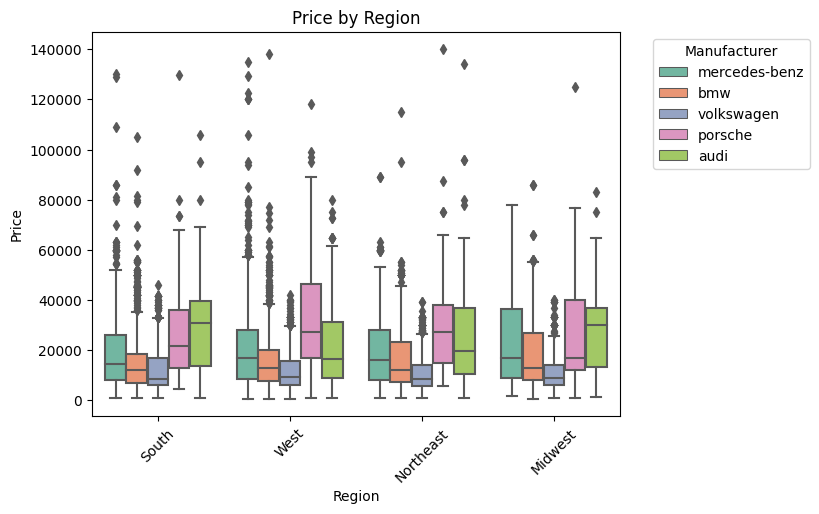

In [76]:
# Region vs. Price
sns.boxplot(data=german, x='region', y='price', hue='manufacturer', palette='Set2')
plt.title('Price by Region')
plt.xlabel('Region')
plt.ylabel('Price')
plt.tight_layout()
plt.xticks(rotation=45)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

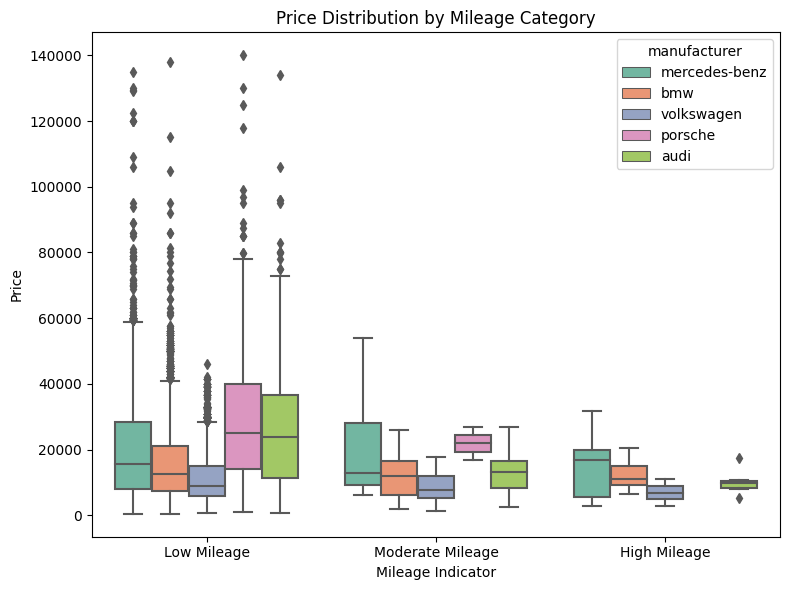

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=german, x='mileage_indicator', y='price', hue='manufacturer', palette='Set2')
plt.title('Price Distribution by Mileage Category')
plt.xlabel('Mileage Indicator')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

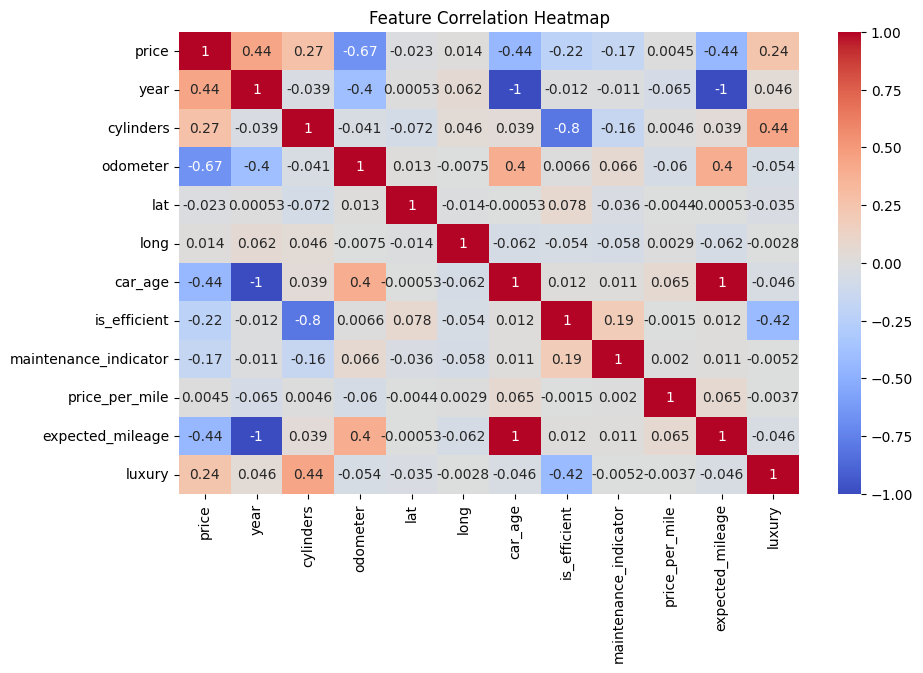

In [52]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(german.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Summary Tables: Brand & Condition Trends

To uncover broader patterns in the dataset, I generated summary tables that highlight key trends across brands and vehicle conditions.

- <b>Top Brands by Volume and Median Price</b>: This table lists the most common German manufacturers in the dataset, along with their respective listing volume and median price. It helps identify which brands dominate the resale market and how they compare in typical pricing.

- <b>Condition Breakdown by Manufacturer</b>: This table displays the distribution of vehicle condition categories (e.g., like new, excellent, good) across each manufacturer. It provides insight into how condition varies between brands — for instance, some luxury brands may have a higher proportion of well-maintained vehicles.



In [83]:
# Top Brands by Volume & Median Price
brand_summary = german.groupby('manufacturer')['price'].agg(['count', 'median']).sort_values('count', ascending=False)
brand_summary.columns = ['Number of Listings', 'Median Price']
print(brand_summary)

               Number of Listings  Median Price
manufacturer                                   
bmw                          3233       12499.0
mercedes-benz                3126       15750.0
volkswagen                   2460        8900.0
audi                         2128       23990.0
porsche                       396       25000.0


In [54]:
# Condition by Manufacturer
pd.crosstab(german['manufacturer'], german['condition'], normalize='index')

condition,excellent,fair,good,like new,new,salvage
manufacturer,,,,,,
audi,0.308271,0.013628,0.588816,0.086466,0.001880,0.000940
bmw,0.499536,0.027219,0.336839,0.131766,0.004021,0.000619
mercedes-benz,0.429623,0.017914,0.426424,0.119962,0.004159,0.001919
porsche,0.502525,0.015152,0.351010,0.126263,0.005051,0.000000
volkswagen,0.449187,0.036179,0.406098,0.103659,0.002846,0.002033


# Machine Learning Model

To predict the price of used German vehicles, I implemented and evaluated two powerful machine learning algorithms: Random Forest Regressor and XGBoost Regressor. Both are tree-based ensemble models capable of capturing non-linear relationships and feature interactions — ideal for this type of structured, real-world dataset.

Random Forest Regressor:
- Random Forest is an ensemble learning method that constructs multiple decision trees and aggregates their outputs. It is robust to noise and overfitting, and provides easy access to feature importance metrics.
- Trained on engineered features including car_age, condition, odometer, and mileage_indicator
- Used as a strong baseline model due to its stability and minimal tuning requirements
- Provided useful feature rankings and good interpretability

XGBoost Regressor:
- XGBoost (Extreme Gradient Boosting) builds decision trees sequentially, where each tree corrects the errors of the previous ones. It often achieves higher accuracy than Random Forest in exchange for more tuning complexity.
- Tuned with depth and learning rate hyperparameters for optimal performance
- Outperformed Random Forest on most evaluation metrics
- Offered strong generalization and more nuanced feature weighting

Model Evaluation:

Both models were evaluated using:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score (Coefficient of Determination)

Predictions were visualized using scatter plots of predicted vs. actual price, revealing how closely the models approximated real-world pricing behavior across brands and conditions.

Feature Importance Analysis:
- Both models provided ranked feature importance outputs:
- Features like car age, odometer, and condition had the strongest predictive power
- Custom-engineered features like mileage indicator and price per mile also contributed meaningfully

In [20]:
# Training Using Random Forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
# Selecting features and target
features = ['car_age', 'odometer', 'cylinders', 'fuel', 'transmission',
            'region', 'type', 'title_status', 'condition', 'state', 'mileage_indicator',
            'manufacturer', 'is_efficient', 'maintenance_indicator', 'luxury']

X = german[features]
y = german['price']

In [22]:
# Setting up Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Splitting Features
categorical = ['fuel', 'transmission', 'type', 'condition', 'state',
               'region', 'title_status', 'mileage_indicator', 'manufacturer']
numerical = ['car_age', 'odometer', 'cylinders', 'is_efficient',
             'maintenance_indicator', 'luxury']

In [24]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

In [31]:
rfmodel = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [32]:
# Training the Model
rfmodel.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['car_age', 'odometer',
                                                   'cylinders', 'is_efficient',
                                                   'maintenance_indicator',
                                                   'luxury']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'transmission',
                                                   'type', 'condition', 'state',
                                                   'region', 'title_status',
                                                   'mileage_indicator',
                                                   'manufacturer'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [33]:
# Training Using XGBoost
from xgboost import XGBRegressor

xgb_model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

In [34]:
xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['car_age', 'odometer',
                                                   'cylinders', 'is_efficient',
                                                   'maintenance_indicator',
                                                   'luxury']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['fuel', 'transmission',
                                                   'type', 'condition', 'state',
                                                   'region', 'title_status',
                                                   'mileage_indicator',
                                                   'manufacturer'])])),
                ('regressor',
                 XGBR...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, name):
    preds = model.predict(X_test)
    print(f"{name} Performance:")
    print("  MAE :", mean_absolute_error(y_test, preds))
    print("  RMSE:", mean_squared_error(y_test, preds, squared=False))
    print("  R²  :", r2_score(y_test, preds))
    print("-" * 40)

evaluate(rfmodel, "Random Forest")
evaluate(xgb_model, "XGBoost")

Random Forest Performance:
  MAE : 2653.699944236007
  RMSE: 5851.891960056388
  R²  : 0.8559420555043207
----------------------------------------
XGBoost Performance:
  MAE : 2857.8979106178467
  RMSE: 5616.017925278412
  R²  : 0.8673211845474904
----------------------------------------


In [36]:
# Predicted vs. Actual Price (Scatter Plot)
import matplotlib.pyplot as plt
import seaborn as sns

def plot_predictions(y_test, preds, model_name):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=preds, alpha=0.4)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{model_name} Predictions vs Actual")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [38]:
# Predict
rf_preds = rfmodel.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

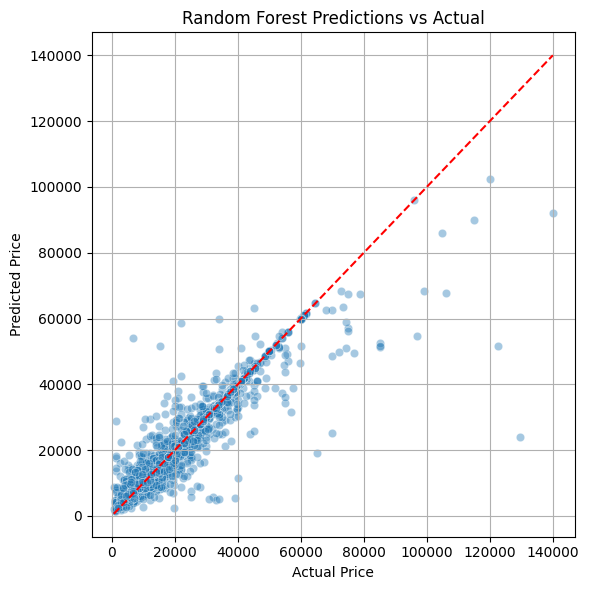

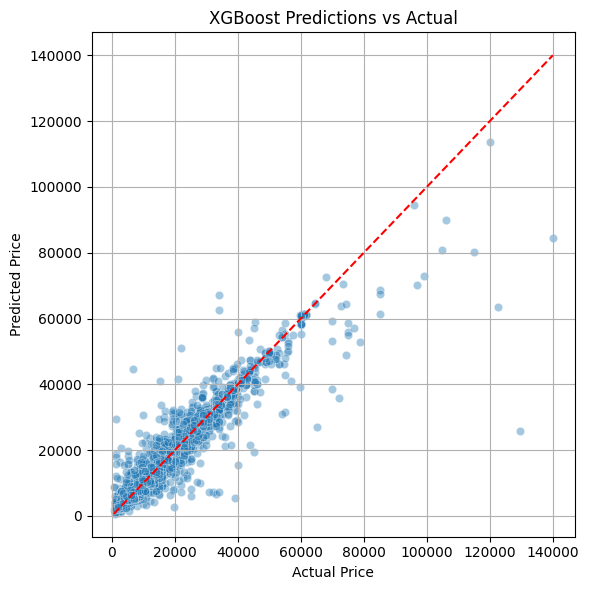

In [39]:
# Plot
plot_predictions(y_test, rf_preds, "Random Forest")
plot_predictions(y_test, xgb_preds, "XGBoost")

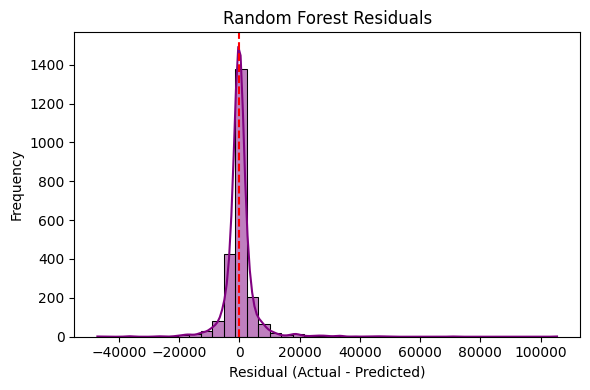

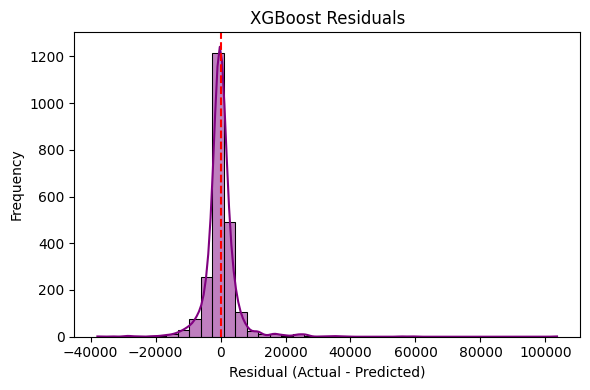

In [40]:
# Residual Plot
def plot_residuals(y_test, preds, model_name):
    residuals = y_test - preds
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=40, kde=True, color='purple')
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"{model_name} Residuals")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_residuals(y_test, rf_preds, "Random Forest")
plot_residuals(y_test, xgb_preds, "XGBoost")

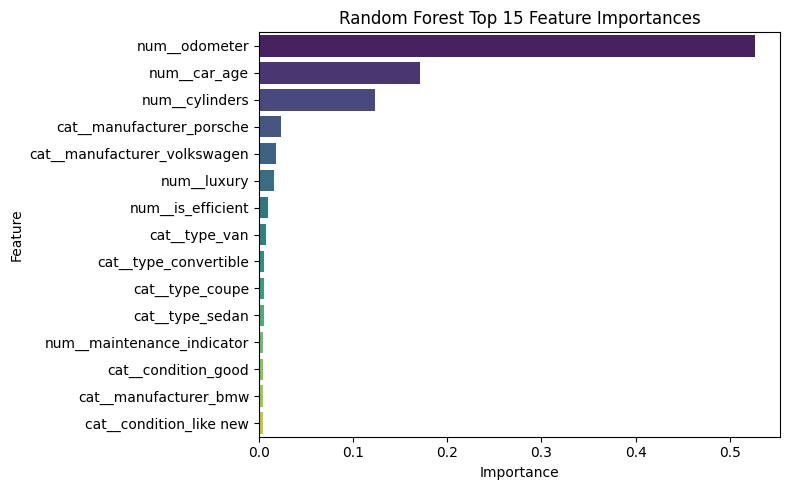

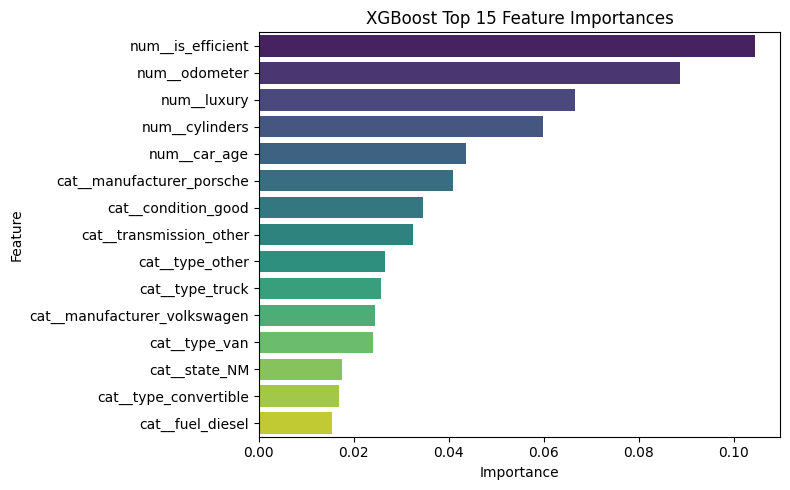

In [42]:
# Feature Importances
def plot_feature_importance(model, model_name):
    importances = model.named_steps['regressor'].feature_importances_
    feature_names = model.named_steps['preprocessing'].get_feature_names_out()

    fi_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(15)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
    plt.title(f"{model_name} Top 15 Feature Importances")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rfmodel, "Random Forest")
plot_feature_importance(xgb_model, "XGBoost")